# Pymaceuticals Inc.

---

### Analysis
* The first visualized output of the analysis is the bar chart that shows the number of observed mouse time points. The graph shows that two regimens have the highest numbers; the regimens are Capamulin and Ramicane. Both regimens have observed time points exceeding 200. 
* As depicted in the pie charts, there appears to be a balanced gender distribution; the split is nearly equal with 50.4% male and 49.6% female. 
* The visualization of the distribution of tumor volume for the four selected regimens in the box plot provided some insight into the effectiveness of Capomulin and Ramicane. Both regimens appear to have lowered tumor volumes than the remaining two regimens, thereby indicating their effectiveness. The box for Capomulin is notably smaller indicating that there is less variability in the data. Put differently, the IQRs indicate smaller variability. Infubinol and Ceftamin, on the other hand, showed wider IQRs indicating more variability in the outcome of the treatments. It is safe to say that the the two regimens performed poorly in reducing tumor volume. One noticeable outcome of the box plot is that it showed an outlier in the Infubinol regimen indicating the presence of a mouse with significantly smaller tumor volume (mm3) than others in the group. 
* Th mouse selected for the line plot, L509, showed the effectiveness of the Capomulin regimen. Although an initial steady increase in tumor volume was seen for about 20 days, the volume significantly decreased. With a couple of stabilizations and slight increases, the line plot certainly depicts the effectiveness of the regimen in lowering tumor volume. This single mouse analysis corroborates the previous positive assessment of the Capomulin regimen.    
* The scatter plots reveal a positive correlation between mouse weight and average tumor volume. As the weight of the mice increases, the tumor volume also tends to rise. This positive relationship is further confirmed by the correlation coefficient of 0.84.



In [1]:
# Dependencies and Setup (provided in the starter file)
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np # added this to calculate the percentiles for the quartiles. 
from scipy.stats import linregress # added this to perform the line regression.

# Study data files (provided in the starter file)
# Since I created another directory for the main script to run from, I added 
# the '..' to the path so it goes up a directory to locate the data files. 
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results (provided in the starter file)
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# I combined the two resource files into one DataFRame on Mouse ID. 
combined_pymaceuticals_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
# After creating the new DataFrame, I realized that the order of columns was different than the snippet of 
# the DataFrame provided in the starter file.
# I added the following line of code to mathch the orders of the new DataFrame to the order in the starter file. 
column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 
                'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
combined_pymaceuticals_data = combined_pymaceuticals_data[column_order]
# Display the data table for preview
# I displayed the first five rows. 
combined_pymaceuticals_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# I used the .nunique() method to count the number of mice in the Mouse ID column. 
number_of_mice = combined_pymaceuticals_data['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# I used a combination of .duplicated() and .unique() methods to identify the duplicate mice. 
duplicate_mice = combined_pymaceuticals_data[combined_pymaceuticals_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id_df = combined_pymaceuticals_data[combined_pymaceuticals_data['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I filtered out the duplicate data and created a clean DataFrame as follows. 
# The code effectively removes rows containing mouse id g989. 
clean_pymaceuticals_data = combined_pymaceuticals_data[combined_pymaceuticals_data['Mouse ID'] != 'g989']
clean_pymaceuticals_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# I used the method that I initially used to check the number of mice and passed the new, clean DataFrame. 
number_of_mice = clean_pymaceuticals_data['Mouse ID'].nunique()
number_of_mice

248

# Summary Statistics 

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# I used the .agg() method out of the pandas library to do a summerized statistical analysis on the groupby data. 
summary_statistics = clean_pymaceuticals_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean', 
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)
# Assemble the resulting series into a single summary DataFrame.
# I applied some formatting to the column headers for better readability. 
summary_statistics.columns=[
    'Mean Tumor Volume',
    'Median Tumor Volume',
    'Tumor Volumne Variance',
    'Tumor Volume Std.Dev.',
    'Tumor Volume Std.Err.'
]
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volumne Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts 

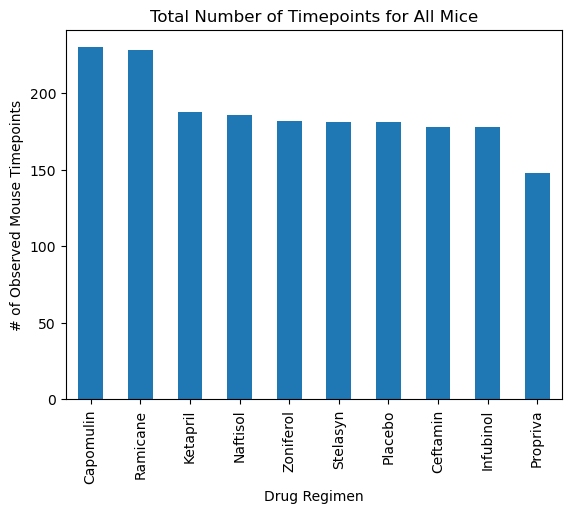

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# For this task, I started by grouping the data by 'Drug Regimen' and counted the number of rows. 
# I also sorted the data in decending orders so that the bar plots resemble the one in the starter code and are easy to understand. 
drug_regimen_count = clean_pymaceuticals_data.groupby('Drug Regimen').size()
drug_regimen_count = drug_regimen_count.sort_values(ascending=False)
# The next step is to generate the bar plot using the DataFrame.plot method. The DataFrame in this case is drug_regimen_count. 
drug_regimen_count.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.title('Total Number of Timepoints for All Mice')
plt.show()

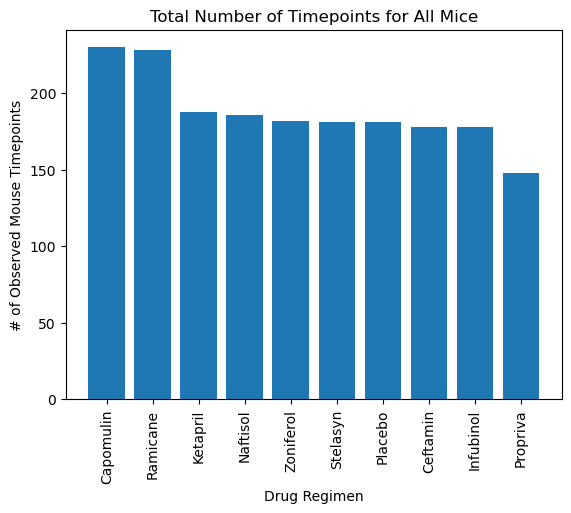

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Once again, I started by grouping the data by 'Drug Regimen' and counted the number of rows.
# I also sorted the data in decending orders so that the bar plots resemble the one in the starter code and are easy to understand.
drug_regimen_count = clean_pymaceuticals_data.groupby('Drug Regimen').size()
drug_regimen_count = drug_regimen_count.sort_values(ascending=False)
plt.bar(drug_regimen_count.index, drug_regimen_count.values)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Timepoints for All Mice')
plt.show()


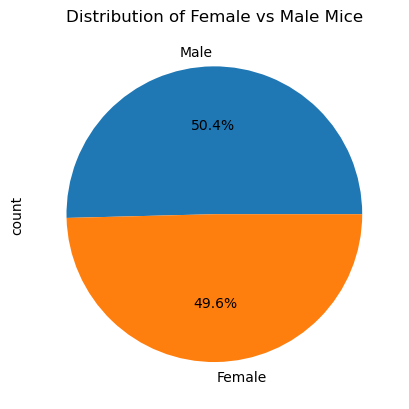

In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# I dropped any rows hat might be there with the same mouse on different timepoints. 
unique_mice = clean_pymaceuticals_data.drop_duplicates(subset='Mouse ID')
# To get the unique mice based on gender, I applied the .value_counts() method on the 'Sex' column of the clean DataFrame. 
mice_by_gender = unique_mice['Sex'].value_counts()
# Make the pie chart
# Then I proceeded to making a basic pie chart the
mice_by_gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

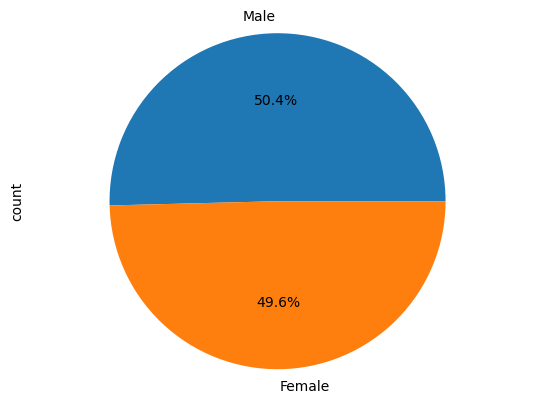

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# To get the unique mice based on gender, I applied the .value_counts() method on the 'Sex' column of the clean DataFrame. 
mice_by_gender = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(mice_by_gender, labels=mice_by_gender.index, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('count')
plt.show()

# Quartiles, Outliers and Boxplots 

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# To achieve this, I grouped the data by Mouse ID and used the .max() method on the Timepoints columns of the filtered DataFrame. 
# I also reset the index. 
greatest_timepoints = clean_pymaceuticals_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_volume_df = pd.merge(clean_pymaceuticals_data, greatest_timepoints, on=['Mouse ID', 'Timepoint'], how='right')
last_volume_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in list_of_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_volume_df[last_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_volume_data.append(treatment_data.tolist())
    # I identified the sirst and third quartiles to subsequently calculate the IQR. 
    first_quartile = np.percentile(treatment_data, 25)
    third_quartile = np.percentile(treatment_data, 75)

    IQR= third_quartile - first_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5 * IQR)
    upper_bound = third_quartile + (1.5 * IQR)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


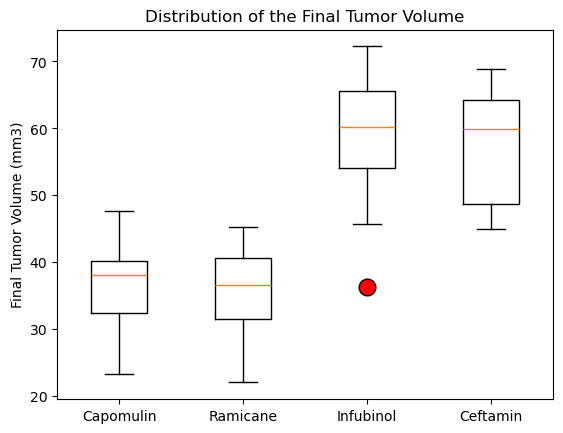

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# In this step i used the tumor_volume_data list I created above. 
plt.boxplot(tumor_volume_data, tick_labels=list_of_treatments, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of the Final Tumor Volume')
plt.show()


## Line and Scatter Plots

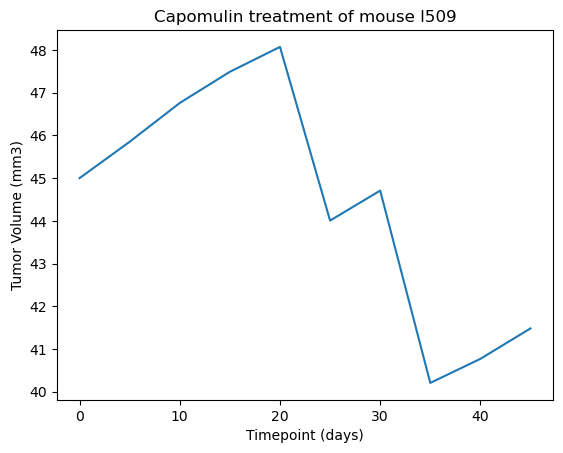

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I filtered the data for capomulin regimen first. 
capomulin_regimen = clean_pymaceuticals_data.loc[clean_pymaceuticals_data['Drug Regimen'] == 'Capomulin']
# For the single mouse ID, I used the loc method to locate the ID in the filtered capomulin data. 
single_mouse_id = capomulin_regimen.loc[capomulin_regimen['Mouse ID'] == 'l509',:]
# Generate the line plot. 
plt.plot(single_mouse_id['Timepoint'], single_mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

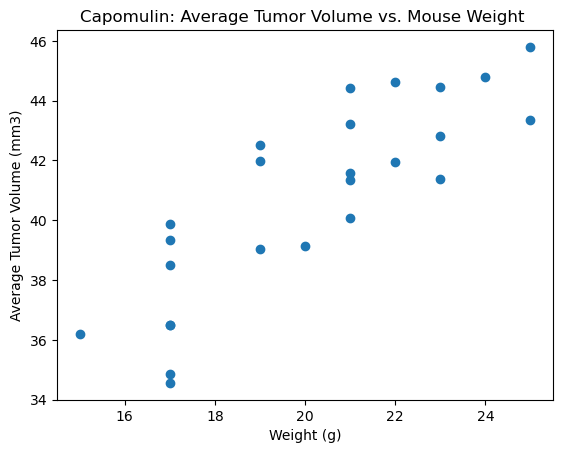

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# The first step I took is to group the data by mouse id and calculate the average tumor volume. 
# I used the filtered data used above to generate the line plot. 
capomulin_average = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# I then merged the tumor volume with the mouse weight (after filtering the weight volume) as the scatter plots are to show weight vs average tumor volume. 
capomulin_weight = capomulin_regimen[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')
capomulin_weight['Average Tumor Volume (mm3)'] = capomulin_average

# Then I generated the scatter plots. 
plt.scatter(capomulin_weight['Weight (g)'], capomulin_weight['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs. Mouse Weight ')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


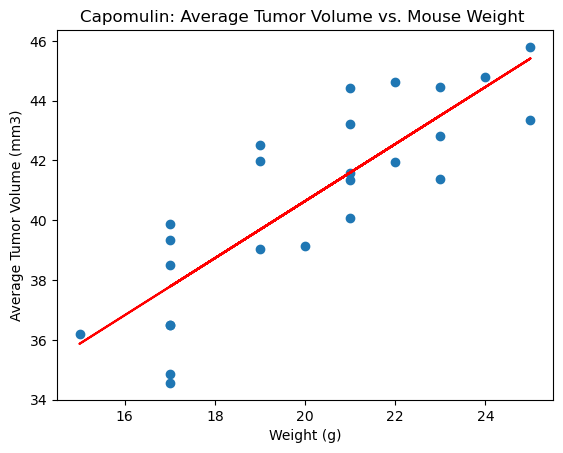

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# I assigned the x and y values. 
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_weight['Average Tumor Volume (mm3)']
# I calculated the correlation coefficient
correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
# The following line is copied from regression.solution.ipynb notebook in the activities materials for module 5. 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Ithen plotted the linear regression line after re-plotting the scatters. 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs. Mouse Weight ')
plt.show()